<a href="https://colab.research.google.com/github/zavaleta/Fuzzy_logic_UFRRJ/blob/main/RN_exercicios.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
# Redes Neurais
#### Prof. Dr. Jorge Zavaleta
##### E-mail: jorge.zavaleta@ppgi.ufrj.br
---

# Perceptron

In [ ]:
import numpy as np
from sklearn.linear_model import Perceptron
from matplotlib.colors import ListedColormap
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
%matplotlib inline

## Operador Lógico OR

|x1  |x2  | y  |
|:--:|:--:|:--:|
| 0  | 0  |  0 |
| 0  | 1  |  1 |
| 1  | 0  |  1 |
| 1  | 1  |  1 |

## Entrada de Dados - x

In [ ]:
# entrada de dados 
X = np.array([[0, 0],[0 , 1], [1, 0],[1,1]])
X.shape

(4, 2)

## Saída - y

In [ ]:
# saida final função OR
y = np.array([0, 1, 1, 1])
y.shape

(4,)

In [ ]:
# modificar a saida
#y.ravel()

## Graficando os dados

In [ ]:
# coordenadas
# valor x=y=0
x0 = X[0][0]
y0 = X[0][1]
print([x0,y0])
# outros valores
x1 = X[1:4,0] # x
y1 = X[1:4,1] # y
print(x1,y1)

[0, 0]
[0 1 1] [1 0 1]


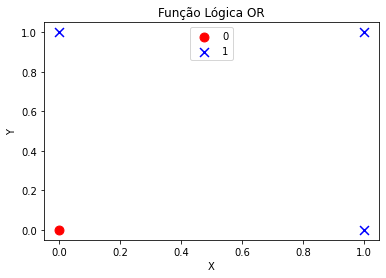

In [ ]:
plt.scatter(x0,y0,color='red', marker='o', label='0', s=80)
plt.scatter(x1,y1,color='blue', marker='x', label='1',s=80)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Função Lógica OR')
plt.legend(loc='upper center')
plt.show()

# Traçando o limite de decisão (Hiperplano)

## Equação do Hiperplano


$x_{1}W_{1} + x_{2}W_{2} + b = 0 $

$x_{1}W_{1} + x_{2}W_{2} = -b $

$ x_{2}W_{2} = - x_{1}W_{1} -b $ 

$ x_{2} = - x_{1}\frac{W_{1}}{W_{2}} -\frac{b}{w_{2}} $

Logo:
$ x_{2} =  ax_{1} - R $, fazendo $ x_{2} =y $ e $x_{1} = x $ ; $a =-\frac{W_{1}}{W_{2}}$ e $R = -\frac{b}{W_{2}}$

Temos a equação do HIPERPLANO:

$ y = ax + R $


# Usando a Rede Perceptron

In [ ]:
# definindo a rede perceptron
per = Perceptron(random_state=10, max_iter=1000, tol = 0.01, eta0=0.1)

### Entrada de dados e predição dos valores

In [ ]:
# Entrada = X
# saida = y
per.fit(X,y)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=0.1,
           fit_intercept=True, max_iter=1000, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=10, shuffle=True, tol=0.01,
           validation_fraction=0.1, verbose=0, warm_start=False)

### Prognóstico dos valores

In [ ]:
# saida de dados = y
saida = per.predict([[1, 1]])
print('Saída:')
print('y =',saida[0])

Saída:
y = 1


In [ ]:
# x = [0,0]
s1 = per.predict([[0, 0]])
print('y =',s1[0])

y = 0


### Visualizando os resultados totais

In [ ]:
# Visualizando os resultados
print("Predição = " + str(per.predict(X)))
print("Atual    = " + str(y))
print("Acurácia = " + str(per.score(X, y)*100) + "%")

Predição = [0 1 1 1]
Atual    = [0 1 1 1]
Acurácia = 100.0%


###  Verificando o valor dos pesos 'coef_'

In [ ]:
# verificando os pesos
[w1,w2] = per.coef_[0]
print('[w1, w2] =',[w1,w2])

[w1, w2] = [0.2, 0.2]


### Verificando o bias

In [ ]:
# bias = b
b = per.intercept_[0]
print('Bias =',b)

Bias = -0.1


In [ ]:
# scores do perceptron
pred_scores = per.decision_function(X)
print("Escores do Perceptron OR: {}".format(pred_scores))

Escores do Perceptron OR: [-0.1  0.1  0.1  0.3]


In [ ]:
# Label das classes
print(per.classes_)

[0 1]


In [ ]:
# numero de atualizacoes
print(per.t_)

29.0


## Calculando o hiperplano 

In [ ]:
# primeira forma
def reta(plt, perceptron):
    # y limites
    ymin, ymax = plt.ylim()
    # pesos
    w = perceptron.coef_[0]
    # coeficiente da reta
    a = -w[0] / w[1]
    # termo independente da reta
    R = -(perceptron.intercept_[0]) / w[1]
    # calculando os valores para x
    xl = np.linspace(ymin, ymax)
    # calculando valores para y
    yl =  a * xl + R
    return [xl,yl]

## Calculando o limite de decisção

In [ ]:
def plot_decision_boundary(classifier, X, y, title):
    xmin, xmax = np.min(X[:, 0]) - 0.05, np.max(X[:, 0]) + 0.05
    ymin, ymax = np.min(X[:, 1]) - 0.05, np.max(X[:, 1]) + 0.05
    step = 0.01
    cm = plt.cm.coolwarm_r
    #cm = plt.cm.RdBu
    thr = 0.0
    xx, yy = np.meshgrid(np.arange(xmin - thr, xmax + thr, step), np.arange(ymin - thr, ymax + thr, step))
    #
    if hasattr(classifier, 'decision_function'):
        Z = classifier.decision_function(np.hstack((xx.ravel()[:, np.newaxis], yy.ravel()[:, np.newaxis])))
    else:
        Z = classifier.predict_proba(np.hstack((xx.ravel()[:, np.newaxis], yy.ravel()[:, np.newaxis])))[:, 1]
        
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, cmap=cm, alpha=0.8)
    plt.colorbar()
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=ListedColormap(['#FF0000', '#0000FF']), alpha=0.6)
    plt.xlim(xmin, xmax)
    plt.ylim(ymin, ymax)
    plt.title(title)

## Graficando a separação das classes

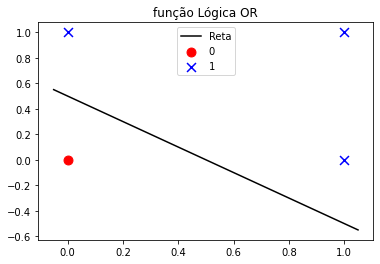

In [ ]:
## Calculando o hiperplano
plt.scatter(x0,y0,color='red', marker='o', label='0',s=80)
plt.scatter(X[1:4,0], X[1:4,1],color='blue', marker='x', label='1',s=80)
# gera os valores para a reta
val = reta(plt,per)
# valores de x
xl = val[0]
#valores de y
yl = val[1]
# grafica a linha
plt.plot(xl,yl, 'k', label='Reta')
#
plt.title('função Lógica OR')
plt.legend(loc='upper center')
plt.show()

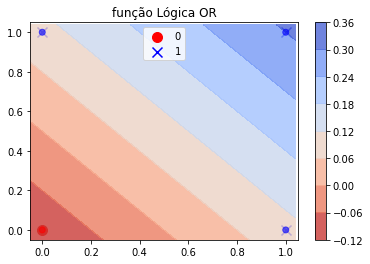

In [ ]:
## Calculando o hiperplano
plt.scatter(x0,y0,color='red', marker='o', label='0',s=100)
plt.scatter(x1,y1,color='blue', marker='x', label='1',s=100)
#
plot_decision_boundary(per,X,y,'função Lógica OR')
#
plt.legend(loc='upper center')
plt.show()

Ao plotar o limite de decisão do Perceptron. A barra de cores à esquerda mostra as pontuações obtidas por $ w ⋅ x + b.$ Cada cor de ponto indica uma classe diferente (azul = 1, vermelho = 0).

# Exercícios

1. Implementar as redes neurais para os opradpres AND e XOR
2. Pesquisa: O que acontece com o operador XOR? Poderia implementar uma solução? 

### Exercício AND

In [ ]:
# valores de entrada
X_AND = np.array([[1, 1],[1 , 0], [0, 1],[0,0]])
print(X_AND)

[[1 1]
 [1 0]
 [0 1]
 [0 0]]


In [ ]:
# valores de saida
y_and = np.array([1,0,0,0])
y_and.shape

(4,)

In [ ]:
# coordenadas
# valor x=y=1
x0_and = X_AND[0][0]
y0_and = X_AND[0][1]
print([x0_and,y0_and])
# outros valores
x1_and = X_AND[1:4,0] # x
y1_and = X_AND[1:4,1] # y
print(x1_and,y1_and)

[1, 1]
[1 0 0] [0 1 0]


### Graficando os valores de AND

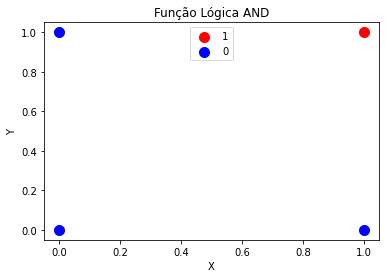

In [ ]:
plt.scatter(x0_and,y0_and,color='red', marker='o', label='1', s=100)
plt.scatter(x1_and,y1_and,color='blue', marker='o', label='0',s=100)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Função Lógica AND')
plt.legend(loc='upper center')
plt.show()

In [ ]:
# A rede perceptron
per_and = Perceptron(random_state=10, max_iter=1000, tol = 0.01, eta0=0.1)

In [ ]:
# Entrada = X_AND
# saida = y_and
saida_and = per_and.fit(X_AND,y_and)
print(saida_and)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=0.1,
           fit_intercept=True, max_iter=1000, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=10, shuffle=True, tol=0.01,
           validation_fraction=0.1, verbose=0, warm_start=False)


### Prognóstico dos valores

In [ ]:
# saida de dados = y
saida_and = per_and.predict([[1, 0]])
print('Saída:')
print('y =',saida_and[0])

Saída:
y = 0


### Visualizando os resultados totais

In [ ]:
# Visualizando os resultados
print("Predição = " + str(per_and.predict(X_AND)))
print("Atual    = " + str(y_and))
print("Acurácia = " + str(per_and.score(X_AND, y_and)*100) + "%")

Predição = [1 0 0 0]
Atual    = [1 0 0 0]
Acurácia = 100.0%


### Grafico da função lógica AND

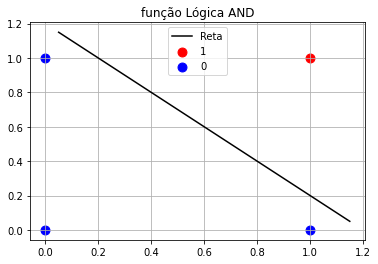

In [ ]:
## Calculando o hiperplano
plt.scatter(x0_and,y0_and,color='red', marker='o', label='1',s=80)
plt.scatter(x1_and, y1_and,color='blue', marker='o', label='0',s=80)
# gera os valores para a reta
valores = reta(plt,per_and)
#print(valores)
# valores de x
xl = valores[0]+0.1
#valores de y
yl = valores[1]+0.1
# grafica a linha
plt.plot(xl,yl, 'k', label='Reta')
#
plt.title('função Lógica AND')
plt.legend(loc='upper center')
plt.grid()
plt.show()

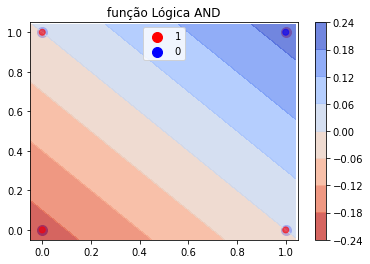

In [ ]:
## Calculando o hiperplano
plt.scatter(x0_and,y0_and,color='red', marker='o', label='1',s=100)
plt.scatter(x1_and,y1_and,color='blue', marker='o', label='0',s=100)
#
plot_decision_boundary(per_and,X_AND,y_and,'função Lógica AND')
#
plt.legend(loc='upper center')
plt.show()

# Exemplo IRIS

In [ ]:
# dados
!git clone https://github.com/zavaleta/Fuzzy_logic_UFRRJ

Cloning into 'Fuzzy_logic_UFRRJ'...
remote: Enumerating objects: 22, done.
remote: Counting objects: 100% (22/22), done.
remote: Compressing objects: 100% (19/19), done.
remote: Total 22 (delta 5), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (22/22), done.


In [ ]:
import pandas as pd
df = pd.read_csv("Fuzzy_logic_UFRRJ/data/iris.csv")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
# repositorio local
#import pandas as pd
#df = pd.read_csv('data/iris.csv', header=None)
#df.head()
#df.tail()

In [ ]:
# verificando valores
#print(df.shape)
cl = df.iloc[0:100, 4].values
print('Classes (species):')
print(cl)

Classes (species):
['setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicol

In [ ]:
# Arrumando os dados
# objetivo final
cy = np.where(cl == 'setosa', -1, 1)
print('Vetor:')
print(cy.shape)

Vetor:
(100,)


In [ ]:
# valores de entrada
I = df.iloc[0:101, [0, 2]].values
print('Valores:')
new_I = np.array(I[1:])
V = []
for i,j in new_I:
    V.append([float(i),float(j)])
XX = np.array(V)
print(XX.shape)

Valores:
(100, 2)


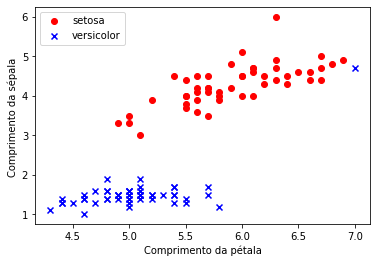

In [ ]:
# Graficando
plt.scatter(XX[cy==1, 0], XX[cy==1, 1],color='red', marker='o', label='setosa')
plt.scatter(XX[cy==-1, 0], XX[cy==-1, 1], color='blue', marker='x', label='versicolor')
plt.xlabel('Comprimento da pétala')
plt.ylabel('Comprimento da sépala ')
plt.legend(loc='upper left')
plt.show()

In [ ]:
ppn = Perceptron(eta0=0.1, max_iter=10)
ppn.fit(XX, cy)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=0.1,
           fit_intercept=True, max_iter=10, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=0, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

## Graficar o Hiperplano
Observe o gráfico, existe algum erro? Cómo poderia ser resolvido?